In [129]:
import networkx as nx 
import matplotlib.pyplot as plt
import community
import numpy as np
%matplotlib inline

In [167]:
G = nx.Graph()
G.add_edge(1,4)  # default edge data=1
G.add_edge(2,4)  # default edge data=1
G.add_edge(3,4)  # default edge data=1
# G.add_edge(1,12)  # default edge data=1
# G.add_edge(2,12)  # default edge data=1
# G.add_edge(3,12)  # default edge data=1
G.add_edge(1,2)  # default edge data=1
G.add_edge(1,3)  # default edge data=1
G.add_edge(2,3)  # default edge data=1


G.add_edge(4,5)  # default edge data=1
G.add_edge(4,6)  # default edge data=1
G.add_edge(4,7)  # default edge data=1
# G.add_edge(12,5)  # default edge data=1
# G.add_edge(12,6)  # default edge data=1
# G.add_edge(12,7)  # default edge data=1
G.add_edge(5,6)  # default edge data=1
G.add_edge(5,7)  # default edge data=1
G.add_edge(6,7)  # default edge data=1
# G.add_edge(10,11)  # default edge data=1


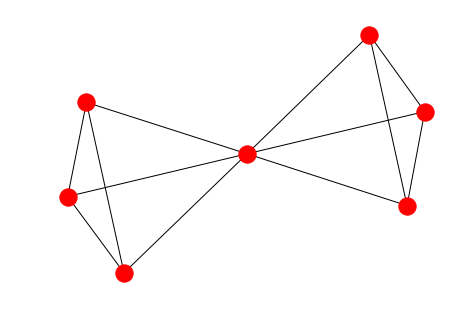

In [126]:
nx.draw(G)

In [77]:
nx.eigenvector_centrality(G)

{1: 0.3262607265371391,
 2: 0.3262607265371391,
 3: 0.3262607265371391,
 4: 0.4250433095090128,
 5: 0.3262607265371391,
 6: 0.3262607265371391,
 7: 0.3262607265371391,
 10: 1.932077383016172e-14,
 11: 1.932077383016172e-14,
 12: 0.4250433095090128}

In [107]:
nx.katz_centrality(F)

{0: 0.4472135954999579,
 1: 0.4472135954999579,
 2: 0.4472135954999579,
 3: 0.4472135954999579,
 4: 0.4472135954999579}

In [32]:
F = nx.Graph()
for i in range(5):
    for j in range(5):
        F.add_edge(i,j)

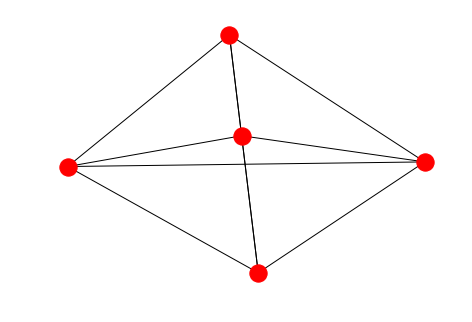

In [33]:
nx.draw(F)

In [98]:
nx.edge_betweenness_centrality(G)

{(1, 2): 0.022222222222222223,
 (1, 3): 0.022222222222222223,
 (1, 4): 0.05925925925925927,
 (1, 12): 0.05925925925925926,
 (2, 3): 0.022222222222222223,
 (2, 4): 0.05925925925925927,
 (2, 12): 0.05925925925925926,
 (3, 4): 0.05925925925925927,
 (3, 12): 0.05925925925925926,
 (4, 5): 0.05925925925925927,
 (4, 6): 0.05925925925925927,
 (4, 7): 0.05925925925925927,
 (5, 6): 0.022222222222222223,
 (5, 7): 0.022222222222222223,
 (5, 12): 0.05925925925925927,
 (6, 7): 0.022222222222222223,
 (6, 12): 0.05925925925925927,
 (7, 12): 0.05925925925925927,
 (10, 11): 0.022222222222222223}

In [105]:
nx.estrada_index(G)

47.364987398194344

In [95]:
T = nx.barbell_graph(10,1)

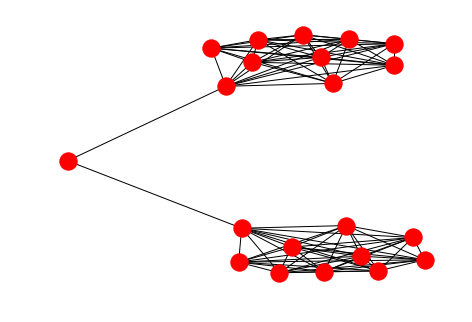

In [96]:
nx.draw(T)

In [156]:
nx.eigenvector_centrality(T)

{0: 0.2228123934215467,
 1: 0.2228123934215467,
 2: 0.2228123934215467,
 3: 0.2228123934215467,
 4: 0.2228123934215467,
 5: 0.2228123934215467,
 6: 0.2228123934215467,
 7: 0.2228123934215467,
 8: 0.2228123934215467,
 9: 0.22785138822196974,
 10: 0.05050704753156758,
 11: 0.2278513882219698,
 12: 0.22281239342154677,
 13: 0.22281239342154677,
 14: 0.22281239342154677,
 15: 0.22281239342154677,
 16: 0.22281239342154677,
 17: 0.22281239342154677,
 18: 0.22281239342154677,
 19: 0.22281239342154677,
 20: 0.22281239342154677}

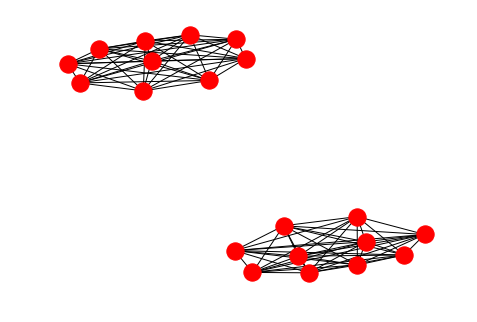

In [158]:
#T.remove_node(10)
nx.draw(T)

In [78]:
for c in nx.find_cliques(G):
    print c

[12, 1, 2, 3]
[12, 5, 6, 7]
[10, 11]
[4, 1, 2, 3]
[4, 5, 6, 7]


In [69]:
set([10,20,30]) - set([10])

{20, 30}

In [146]:
def compute_Q(G, c):
    edge_count = G.number_of_edges()

    # Create the matrix D
    num_comms = len(c)
    d = np.zeros((num_comms, num_comms))

    i = 0
    j = 0
    for comm1 in c:
        for comm2 in c:
            ratio = 0
            if comm1 == comm2:
                ratio/=2
            else:
                edges_between_communities = 0
                for node in comm1:
                    for nbr in nx.neighbors(G, node):
                        if nbr in comm2:
                            edges_between_communities +=1
                ratio = edges_between_communities/float(edge_count)

            d[i][j] = ratio
            d[j][i] = ratio
            j+=1
        j = 0
        i+= 1
        
    # Compute Q value
    tr = np.trace(d)
    d2 = np.matmul(d,d)
    sumd2 = np.sum(d2)
    q = tr-sumd2
    return q

In [162]:
# G.remove_node(4)
compute_Q(G,[[1,2,4],[5,6,7]])

-0.125

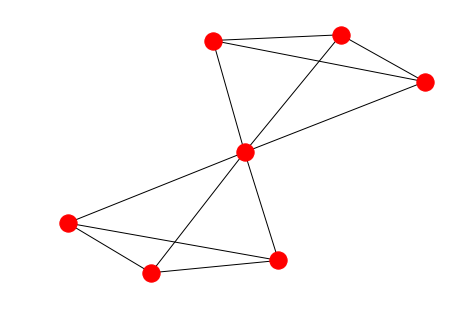

In [161]:
nx.draw(G)

In [168]:
G.remove_node(4)
for cc in nx.connected_components(G):
    print cc

set([1, 2, 3])
set([5, 6, 7])


In [108]:
nx.approximate_current_flow_betweenness_centrality(G)

{1: 0.15312499999999998,
 2: 0.13125,
 3: 0.13125,
 4: 0.5249999999999997,
 5: 0.13125000000000003,
 6: 0.13125000000000003,
 7: 0.153125}

In [113]:
part = community.best_partition(G)

AttributeError: 'module' object has no attribute 'best_partition'

In [119]:
for n in G.nodes():
    print n

1
2
3
4
5
6
7


In [127]:
for x in nx.k_clique_communities(G,2):
    print x

frozenset([1, 2, 3, 4, 5, 6, 7])


In [136]:
x = np.array([[1,2],[3,4]])
np.trace(x)

5

In [145]:
np.zeros((10,10))

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

In [134]:
louvain.VertexPartition.MutableVertexPartition(G.)

AttributeError: 'Graph' object has no attribute 'vcount'